- KEY1: value1
- KEY2: value2



# Introduction



I wrote this module to allow me to write lecture notes in org-mode, but export them to ipython notebooks for my students. It also makes it easier to share my work with people who don't use org-mode (although it is a one-way conversion of org to ipynb).

To use this, you have to require the ox-ipynb library. Then you can export this file with the key sequence `C-c C-e n o` to create the ipynb and open it.

In the following sections I will demonstrate a few features.




## Org-mode markup



You should get all the regular markup:

-   **bold text**
-   *italics*
-   <span class="underline">underlined</span>
-   <del>strikethrough</del>
-   `verbatim`
-   `code`
-   superscripts, e.g. H^+
-   subscripts, e.g. CH<sub>4</sub>
-   hyperlinks: [http://github.com/jkitchin/ox-ipynb](http://github.com/jkitchin/ox-ipynb)
-   internal links do not work: [Org-mode markup](example.md)




## Embed equations



You can use LaTeX equations like: $\int_0^1 \sin x dx$.




## Embed code and results



Note that code blocks must be either "ipython" or "R", and the first one determines the language used for all of the code blocks.



In [1]:
import numpy as np
from scipy.integrate import quad

print(quad(lambda x: np.sin(x), 0, 1))

(0.45969769413186023, 5.103669643922839e-15)

Here we force a new cell to be created with the `ipynb-newcell` directive.



This text should be in its own cell.




## Embed tables



You can create tables and they render nicely in the notebook. Note that you probably should not use the tables as data sources to code blocks because the ipython notebook does not support that.

<table border="2" cellspacing="0" cellpadding="6" rules="groups" frame="hsides">
<caption class="t-above"><span class="table-number">Table 1:</span> A table of numbers.</caption>

<colgroup>
<col  class="org-right" />

<col  class="org-right" />
</colgroup>
<thead>
<tr>
<th scope="col" class="org-right">x</th>
<th scope="col" class="org-right">y</th>
</tr>
</thead>

<tbody>
<tr>
<td class="org-right">1</td>
<td class="org-right">1</td>
</tr>


<tr>
<td class="org-right">2</td>
<td class="org-right">4</td>
</tr>


<tr>
<td class="org-right">3</td>
<td class="org-right">9</td>
</tr>
</tbody>
</table>




## Use ipython magic to get inline figures



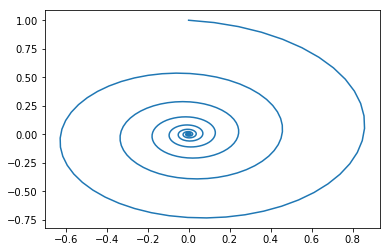

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

z = np.linspace(0, 20 * np.pi, 500)
x = np.sin(z) * np.exp(-0.1 * z)
y = np.cos(z) * np.exp(-0.1 * z)
plt.plot(x, y)


## Store metadata in the ipynb



The directive `ox-ipynb-keyword-metadata` lists file variables that should be saved as metadata in the ipynb.

We can set values as file variables like this: 

![img](./screenshots/date-05-08-2017-time-08-55-41.png)

On export, you can see these are stored in the metadata as:

![img](./screenshots/date-05-08-2017-time-08-56-35.png)

These will show as bullets at the top of the ipynb. These are machine readable, so you can access them with any tool that can read json. You can use this to store author names, document id's, etc.



In [1]:
import json

with open("example.ipynb") as f:
    d = json.loads(f.read())

print(d['metadata']['org'])

{'KEY1': 'value1', 'KEY2': 'value2'}


## Use HTML for fancy markup



You can use html tags directly in the org file. Here are two examples.

 <div class="alert alert-warning">
You can use an alert to highlight something you want to stand out.
 </div>

<font color="blue">This text will show up as blue.</font>

